# Text Analysis for Megadeth's "The Sick, The Dying... And The Dead!" Album

In [168]:
import requests
import re
from bs4 import BeautifulSoup

In [169]:
# Set the URL of the lyrics page that you want to scrape.
url = "http://www.darklyrics.com/lyrics/megadeth/thesickthedyingandthedead.html#1"

In [170]:
# Make an HTTP request to the lyrics page.
response = requests.get(url)

# Parse the HTML of the lyrics page.
soup = BeautifulSoup(response.content, "html.parser")

# Find the HTML element that contains the lyrics.
lyrics_element = soup.find("div", class_="lyrics")

# Extract the lyrics from the HTML element.
lyrics = lyrics_element.get_text()

# Save the lyrics to a file.
with open("lyrics_raw.txt", "w") as f:
    f.write(lyrics)

In [171]:
lyrics

'\n1. The Sick, The Dying... And The Dead!\n(Bring out your dead\nBring out your dead\nBring out your dead\nBring out your dead)\n\nInvaders came on phantom ships\nSailed the Black Sea west to Sicily, yeah, yeah\nThe sick, the dying, and the dead\nAll that was left from this cursed disease, yeah, yeah\n\nIt was the fleas onboard that bit infected rats\nGot blood inside of the fleas, yeah, yeah\nSoon the ghost ships tied up to the docks\nThe path of the plague was complete, yeah, yeah\n\nThe sweet smell of rosies, a pocketful of posies\nYou can\'t mask the fragrance of death in their beds\nThere\'s typhus in the air, and ashes everywhere\nAmongst the sick, the dying, and the dead\n\nFeral creatures feasting on the dead\nDevour rancid human meat, yeah, yeah\nDeath and sickness permeate their bones\nRich or poor, they\'re dragged through the streets, yeah, yeah\n\nOpen up your eyes, so you can see\nAll the sick, the dying, and the dead\n\nDie, die, die!\nDie, die, die!\nDie, die, die!\nDi

In [172]:
# Define the input and output file paths
input_file_path = 'lyrics_raw.txt'  # Replace with the path to your input file
output_file_path = 'lyrics_cur.txt'  # Replace with the path to the output file

# Open the input and output files
with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    # Read each line from the input file
    for line in input_file:
        # Check if the line starts with a digit followed by a period
        if not line.strip().startswith(('0.', '1', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.')):
            # If it doesn't, write it to the output file
            output_file.write(line)

# Print a message to indicate the task is complete
print(f"Lines starting with a number and a period removed. Output written to {output_file_path}")


Lines starting with a number and a period removed. Output written to lyrics_cur.txt


In [173]:
# Define the input and output file paths
input_file_path = 'lyrics_cur.txt'  # Replace with the path to your input file
output_file_path = 'lyrics_cur.txt'  # Replace with the path to the output file

# Open the input file and read its lines
with open(input_file_path, 'r') as input_file:
    lines = input_file.readlines()

# Calculate the number of lines to keep (excluding the last three lines)
lines_to_keep = len(lines) - 3

# Write the lines to the output file, excluding the last three
with open(output_file_path, 'w') as output_file:
    output_file.writelines(lines[:lines_to_keep])

# Print a message to indicate the task is complete
print(f"Last three lines removed. Output written to {output_file_path}")

Last three lines removed. Output written to lyrics_cur.txt


In [174]:
# Remove featuring word

with open("lyrics_cur.txt", "r") as f:
  lines = f.readlines()

# Remove the string "asdf" from each line.
new_lines = []
for line in lines:
  new_lines.append(line.replace("[feat. Ice-T]Concealed", "Concealed"))

# Write the new lines to the text file.
with open("lyrics_cur.txt", "w") as f:
  f.writelines(new_lines)

In [175]:
with open("lyrics_cur.txt", "r") as f:
  lyrics = f.read()

# Wordcloud

In [176]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
def extrae_keywords(text, ignore_words = [],
                     min_word_length = 0,
                     ignore_numbers = True,
                     ignore_case = True):

    # tokenizar:
    tokens = word_tokenize(text)

    # ignorar puntuaciones:
    punct = ['(',')',';',':','[',']',',','.','--','-','#','!','*','"','%', "'",
             "..."]

    # stopwords:
    stop_words = stopwords.words('english')

    # palabras ignoradas extras a minúsculas:
    ignore_words_lower = [x.lower() for x in ignore_words]

    # junta palabras a ignorar:
    all_ignored_words = punct + stop_words + ignore_words_lower

    # genera lista de palabras clave y aplica condiciones:
    keywords = [word for word in tokens \
                    if  word.lower() not in all_ignored_words
                    and len(word) >= min_word_length]

    # elimina palabras que contengan algún número
    if ignore_numbers:
        keywords = [keyword for keyword in keywords if not
                    any(keyword1.isdigit() for keyword1 in keyword)]

    # pasa palabras a minúsculas en caso de ignorarse
    if ignore_case:
        keywords = [keyword.lower() for keyword in keywords]

    return keywords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [177]:
keywords = extrae_keywords(lyrics, ["'re", "'ve", "'ll"],
                           min_word_length = 3)

In [178]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

# Make Cloud Fx
def make_cloud(keywords,
              max_words = 100,
              bg = 'white',
              cmap = 'Dark2',
              maximum_font_size = 256,
              width = 3500,
              height = 2000,
              random_state = 42,
              fig_w = 15,
              fig_h = 10):

    word_could_dict = Counter(keywords)

    wordcloud = (WordCloud(background_color = bg,
                           max_words = max_words,
                           colormap = cmap,
                           stopwords = stopwords.words('spanish'),
                           max_font_size = maximum_font_size,
                           width = width,
                           height = height).
                 generate_from_frequencies(word_could_dict))

    plt.figure(figsize = (fig_w,fig_h))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")

    plt.show()
    plt.close()

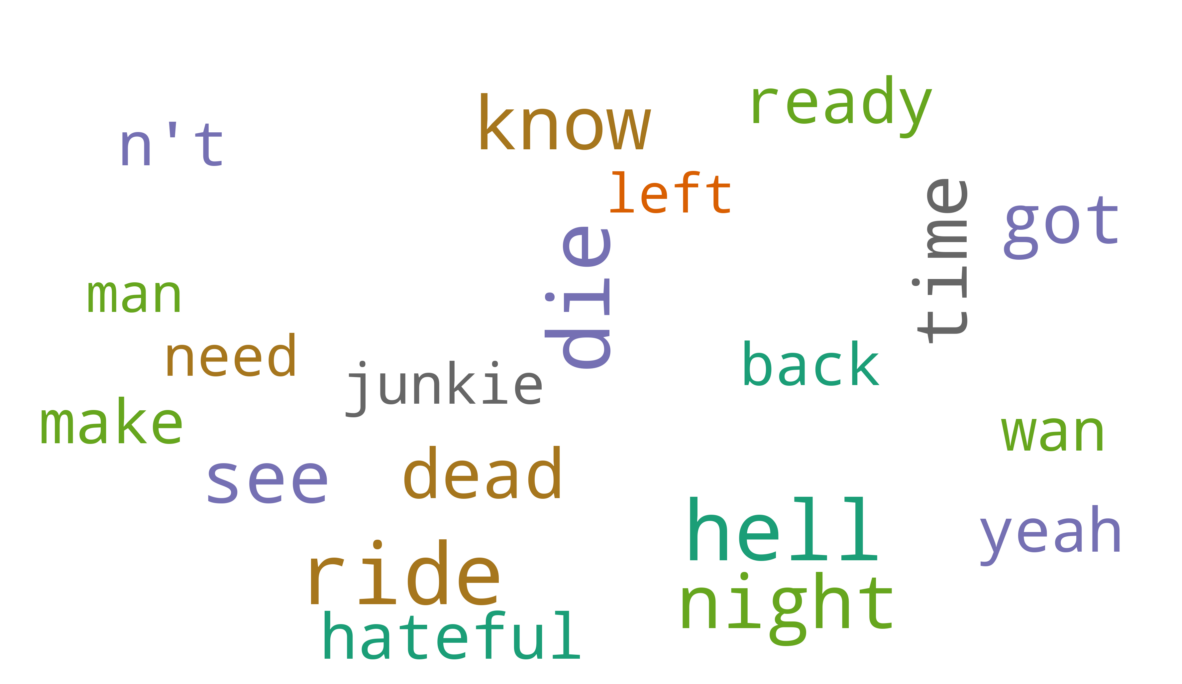

In [179]:
make_cloud(keywords, max_words = 20)